## Objective: To predict a person's risk for TYPE-1, TYPE-2 or zero diabetes. 


### 1. Importing Python Packages

In [5]:
# Importing packages and modules

import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
from matplotlib import pyplot as plt


#Preprocessing
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE # Data Balancing

#Model Building
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier


#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 2. Exploratory Data Analysis

##### a.  Loading the dataset. Describing the data, and printing the first 5 rows

In [6]:
data = pd.read_json('data1.json',lines=True)

In [7]:
data.head()

,Sex,Age,High Blood Pressure,High Cholesterol,Cholesterol Check Past 5 Years,BMI,Smoker,Stroke,CAD,Physical Activity,Alcohol Abuse,Health Insurance,General Health,Phsyical Health,Difficulty Walking,Education,PhysicianID,Label
0,0,9,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1,5.0,15,1.0,4.0,1541,0
1,0,7,0.0,0.0,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0,3.0,0,0.0,6.0,1878,0
2,0,9,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1,5.0,30,1.0,4.0,7345,0
3,0,11,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1,2.0,0,0.0,3.0,7895,0
4,0,11,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,1,2.0,0,0.0,5.0,1776,0


In [8]:
data.info()
# Output: All numeric data, very few null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sex                             100 non-null    int64  
 1   Age                             100 non-null    int64  
 2   High Blood Pressure             88 non-null     float64
 3   High Cholesterol                97 non-null     float64
 4   Cholesterol Check Past 5 Years  98 non-null     float64
 5   BMI                             96 non-null     float64
 6   Smoker                          99 non-null     float64
 7   Stroke                          99 non-null     float64
 8   CAD                             96 non-null     float64
 9   Physical Activity               96 non-null     float64
 10  Alcohol Abuse                   99 non-null     float64
 11  Health Insurance                100 non-null    int64  
 12  General Health                  99 no

##### b. Data Analysis: Checking mean and standard deviation

In [9]:
data.describe()
# Output: 
# The standard deviation is less than 3 for most columns.
# Only BMI and Physical Health have higher standard deveiation. 
# Charts are next to see the distribution. 

,Sex,Age,High Blood Pressure,High Cholesterol,Cholesterol Check Past 5 Years,BMI,Smoker,Stroke,CAD,Physical Activity,Alcohol Abuse,Health Insurance,General Health,Phsyical Health,Difficulty Walking,Education,PhysicianID,Label
count,100.000000,100.000000,88.000000,97.000000,98.000000,96.000000,99.000000,99.000000,96.000000,96.000000,99.000000,100.000000,99.000000,100.00000,98.000000,99.000000,100.000000,100.000000
mean,0.340000,8.750000,0.636364,0.536082,0.969388,28.447917,0.555556,0.090909,0.156250,0.625000,0.050505,0.950000,2.767677,5.61000,0.316327,4.727273,4985.140000,0.520000
std,0.476095,2.865239,0.483802,0.501287,0.173150,4.774648,0.499433,0.288943,0.364998,0.486664,0.220099,0.219043,1.114178,9.95332,0.467433,1.076826,3563.055513,0.870156
min,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,2.000000,1331.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.00000,0.000000,4.000000,1567.000000,0.000000
50%,0.000000,9.000000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.00000,0.000000,5.000000,1901.000000,0.000000
75%,1.000000,11.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,5.50000,1.000000,6.000000,8243.500000,1.250000
max,1.000000,13.000000,1.000000,1.000000,1.000000,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.00000,1.000000,6.000000,9799.000000,2.000000


##### c. Data Cleansing

In [10]:
# 1. Drop unwanted features
data = data.drop(columns=['PhysicianID','Education'])
# What does the distribution of these features and the target variable look like?

In [11]:
# 2. Renaming columns
data.rename(columns={'Cholesterol Check Past 5 Years': 'Cholestrol_last_5years', 'Phsyical Health':'Physical Health'}, inplace=True)

###### -------Null Value Handling----

In [12]:
#3. Let's check the null values
all_nulls = data.isnull().sum()
print(all_nulls)

only_nulls = ['High Blood Pressure','High Cholesterol','Cholestrol_last_5years', 
              'BMI','Smoker','Stroke','CAD','Physical Activity','Alcohol Abuse',
              'General Health','Difficulty Walking']
# Phew! only a few

Sex                        0
Age                        0
High Blood Pressure       12
High Cholesterol           3
Cholestrol_last_5years     2
BMI                        4
Smoker                     1
Stroke                     1
CAD                        4
Physical Activity          4
Alcohol Abuse              1
Health Insurance           0
General Health             1
Physical Health            0
Difficulty Walking         2
Label                      0
dtype: int64


# Q3. I can fill my values with mean after normalization or median without normalization. any advantage? if my data looks normalized, can i simply fill with median?

In [13]:
#Null imputation with Median Values
for key, value in enumerate(data):
    if value in only_nulls:
        data[value].fillna(data[value].median(), inplace = True)
print(data.isnull().sum())

Sex                       0
Age                       0
High Blood Pressure       0
High Cholesterol          0
Cholestrol_last_5years    0
BMI                       0
Smoker                    0
Stroke                    0
CAD                       0
Physical Activity         0
Alcohol Abuse             0
Health Insurance          0
General Health            0
Physical Health           0
Difficulty Walking        0
Label                     0
dtype: int64


In [14]:
# Null value Imputation using mean on normalized data

# for key, value in enumerate(normalized_data):
#     if value in only_nulls:
#             normalized_data[value].fillna(normalized_data[value].mean(), inplace = True)
# print("Summary of null values after normalization: \n",'-'*45,"\n",normalized_data.isnull().sum())

##### ----- Outlier Detection and Correction ----

In [15]:
# added 
# #checking which data point has an outlier in different columns:
# Q3 = np.percentile(data['General Health'], 75)
# Q1 = np.percentile(data['General Health'], 25)
# IQR = Q3-Q1
# LP = Q1 - 1.5 *IQR
# UP = Q3 + 1.5 *IQR

# res = list(filter(lambda x: x if (x >4) else None,data['General Health']))

# print(res)

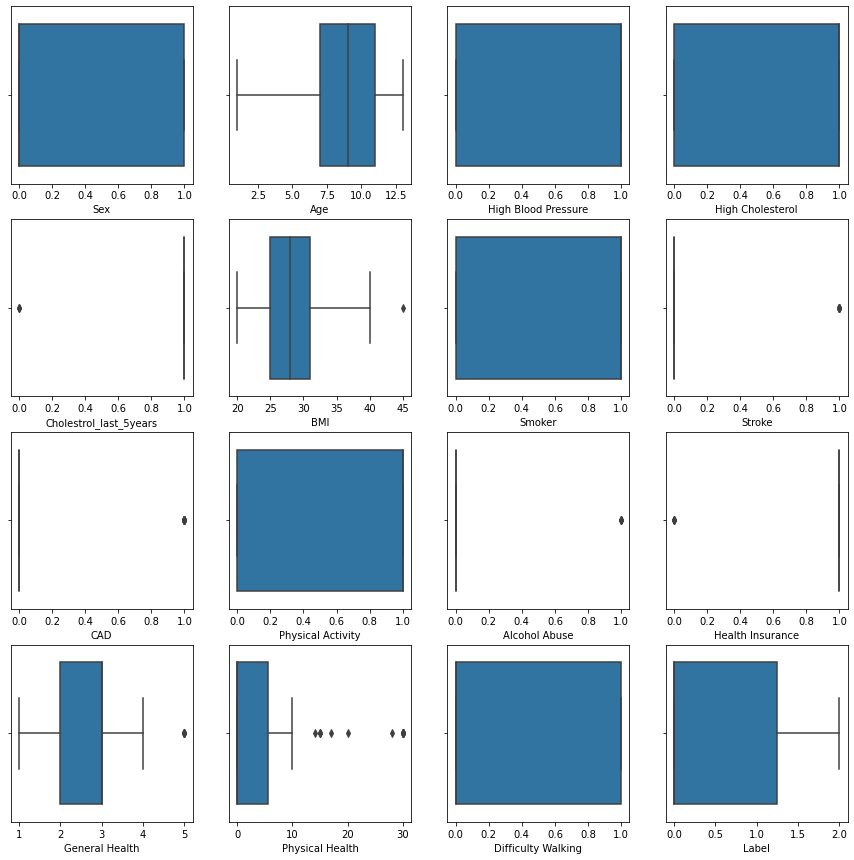

In [16]:
#4.Box Plots 
fig = plt.figure(figsize = (15,15))

for key,val in enumerate(data):
    fig.add_subplot(4,4,key+1)
    sns.boxplot(x=val, data = data)

# Check outliers. I am not dropping any as they look valid.

In [17]:
# Separating outliers using IQR(InterQuartile Range)
outlier_cols = ['BMI','Stroke','CAD','Alcohol Abuse', 'Health Insurance', 
                'Cholestrol_last_5years', 'General Health', 'Physical Health']

for i in outlier_cols:
    col1 = data[i]
    Q3 = np.percentile(col1, 75)
    Q1 = np.percentile(col1, 25)
    IQR = Q3-Q1
    LP = Q1 - 1.5 *IQR
    UP = Q3 + 1.5 *IQR
    print("Col: {}, UP: {}, LP: {}, \nOutlier UP: {}, \nOutlier LP: {}".format(i, UP, LP, col1[col1>UP], col1[col1<LP]))

Col: BMI, UP: 40.0, LP: 16.0, 
Outlier UP: 96    45.0
Name: BMI, dtype: float64, 
Outlier LP: Series([], Name: BMI, dtype: float64)
Col: Stroke, UP: 0.0, LP: 0.0, 
Outlier UP: 14    1.0
20    1.0
26    1.0
30    1.0
42    1.0
64    1.0
68    1.0
81    1.0
92    1.0
Name: Stroke, dtype: float64, 
Outlier LP: Series([], Name: Stroke, dtype: float64)
Col: CAD, UP: 0.0, LP: 0.0, 
Outlier UP: 8     1.0
20    1.0
26    1.0
27    1.0
46    1.0
49    1.0
57    1.0
64    1.0
68    1.0
70    1.0
76    1.0
82    1.0
88    1.0
94    1.0
98    1.0
Name: CAD, dtype: float64, 
Outlier LP: Series([], Name: CAD, dtype: float64)
Col: Alcohol Abuse, UP: 0.0, LP: 0.0, 
Outlier UP: 19    1.0
55    1.0
77    1.0
83    1.0
91    1.0
Name: Alcohol Abuse, dtype: float64, 
Outlier LP: Series([], Name: Alcohol Abuse, dtype: float64)
Col: Health Insurance, UP: 1.0, LP: 1.0, 
Outlier UP: Series([], Name: Health Insurance, dtype: int64), 
Outlier LP: 1     0
31    0
38    0
45    0
95    0
Name: Health Insurance, d

In [18]:
#Remove outlier if there is any using zscore method
# pre = len(dfFilled)
# dfFilled[(np.abs(stats.zscore(dfFilled)) < 3).all(axis=1)]
# post = len(dfFilled)
# print(pre-post)

# Q1: What does such a graph represent? Is it normally distributed? mean and std dev are good. 

##### ---Normalization---

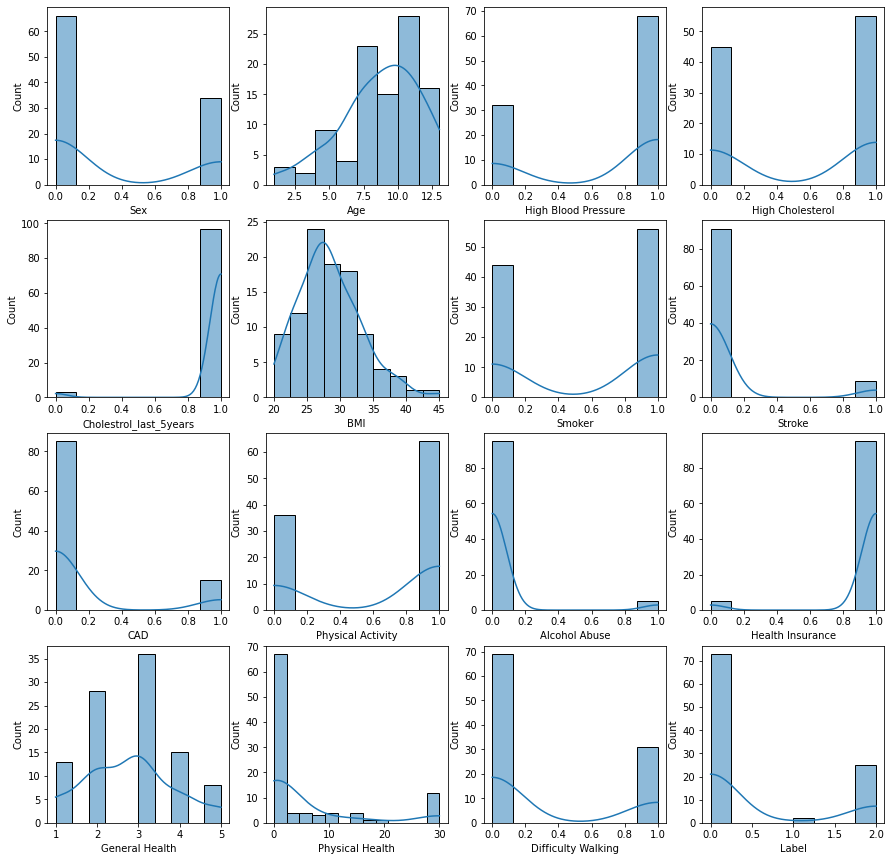

In [19]:
#5. Is my data normally distributed?

def draw_chart(dataset):
    fig = plt.figure(figsize= (15,15))

    for key,cols in enumerate(data):
        fig.add_subplot(4,4,key+1)
        sns.histplot(x=cols,data=dataset, kde=True)

draw_chart(data)

## Feature Engineering

# Q4. I don't see any correlation among features or feature correlation with target. what to conclude? is it a good data?

<AxesSubplot:>

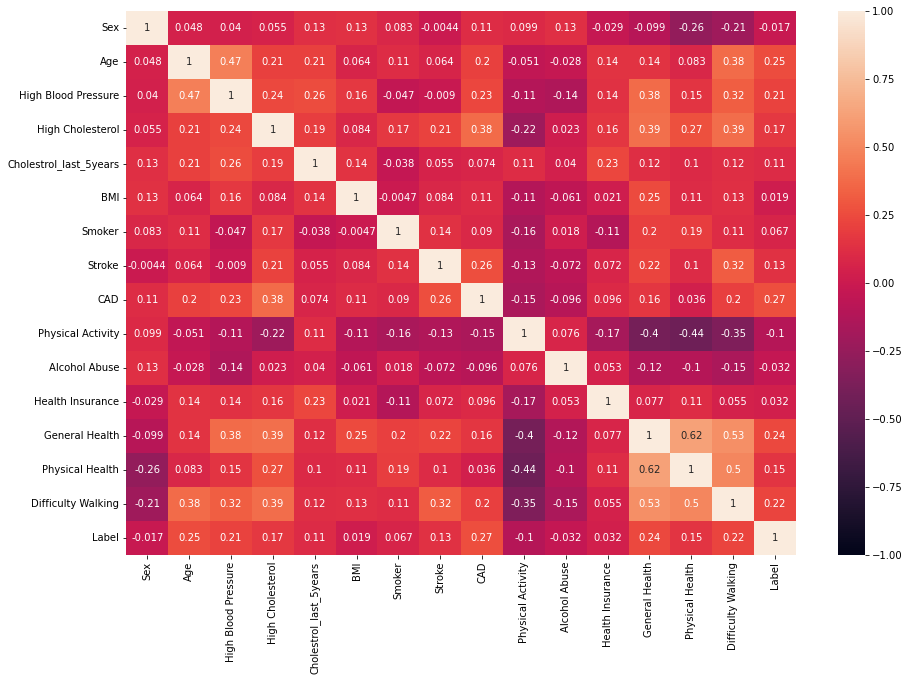

In [20]:
# 1. Correlation using heatmap
#feature_corr = normalized_data.corr()
feature_corr = data.corr()
fig = plt.figure(figsize = (15,10))
sns.heatmap(feature_corr, annot=True, vmin=-1)

In [21]:
#2. Separating independent features from target
target = data['Label']
input_features = data.drop(columns =['Label'])
input_features.columns

Index(['Sex', 'Age', 'High Blood Pressure', 'High Cholesterol',
       'Cholestrol_last_5years', 'BMI', 'Smoker', 'Stroke', 'CAD',
       'Physical Activity', 'Alcohol Abuse', 'Health Insurance',
       'General Health', 'Physical Health', 'Difficulty Walking'],
      dtype='object')

In [22]:
# 3. SelectKBest method
selector = SelectKBest(score_func=f_classif, k=10)
selected_features= selector.fit(input_features,target)
features_score = pd.Series(selected_features.scores_)
feature_column = pd.Series(input_features.columns)

selected_df = pd.concat([feature_column, features_score], axis=1)
selected_df.columns = ['features','Scores']
selected_df.sort_values(by=['Scores'], ascending=False)

#Output: Not much difference in scores. Keeping all the features

,features,Scores
8,CAD,4.043737
1,Age,3.324715
12,General Health,3.289466
2,High Blood Pressure,2.680697
14,Difficulty Walking,2.600049
3,High Cholesterol,2.177440
13,Physical Health,1.972603
6,Smoker,1.622909
7,Stroke,1.043287
9,Physical Activity,0.575985


In [23]:
#4. Dropping duplicates
data.drop_duplicates(inplace=True)
data.shape

(100, 16)

##### Normalize the data

In [24]:
# 5.1 Normalization
mmx = MinMaxScaler()
normalized_data = mmx.fit_transform(input_features)
normalized_data = pd.DataFrame(normalized_data) # Converting array into Dataframe
normalized_data.columns= input_features.columns # Copying names from original data set to normalized data set
normalized_data

,Sex,Age,High Blood Pressure,High Cholesterol,Cholestrol_last_5years,BMI,Smoker,Stroke,CAD,Physical Activity,Alcohol Abuse,Health Insurance,General Health,Physical Health,Difficulty Walking
0,0.0,0.666667,1.0,1.0,1.0,0.80,1.0,0.0,0.0,0.0,0.0,1.0,1.00,0.5,1.0
1,0.0,0.500000,0.0,0.0,0.0,0.32,1.0,0.0,0.0,1.0,0.0,0.0,0.50,0.0,0.0
2,0.0,0.666667,1.0,1.0,1.0,0.32,0.0,0.0,0.0,0.0,0.0,1.0,1.00,1.0,1.0
3,0.0,0.833333,1.0,0.0,1.0,0.28,0.0,0.0,0.0,1.0,0.0,1.0,0.25,0.0,0.0
4,0.0,0.833333,1.0,1.0,1.0,0.16,0.0,0.0,0.0,1.0,0.0,1.0,0.25,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.166667,1.0,0.0,1.0,0.48,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.1,0.0
96,0.0,0.666667,1.0,0.0,1.0,1.00,0.0,0.0,0.0,1.0,0.0,1.0,0.50,0.0,0.0
97,0.0,0.833333,1.0,1.0,1.0,0.32,0.0,0.0,0.0,0.0,0.0,1.0,0.25,0.0,1.0
98,0.0,0.500000,1.0,1.0,1.0,0.60,0.0,0.0,1.0,1.0,0.0,1.0,0.25,0.1,0.0


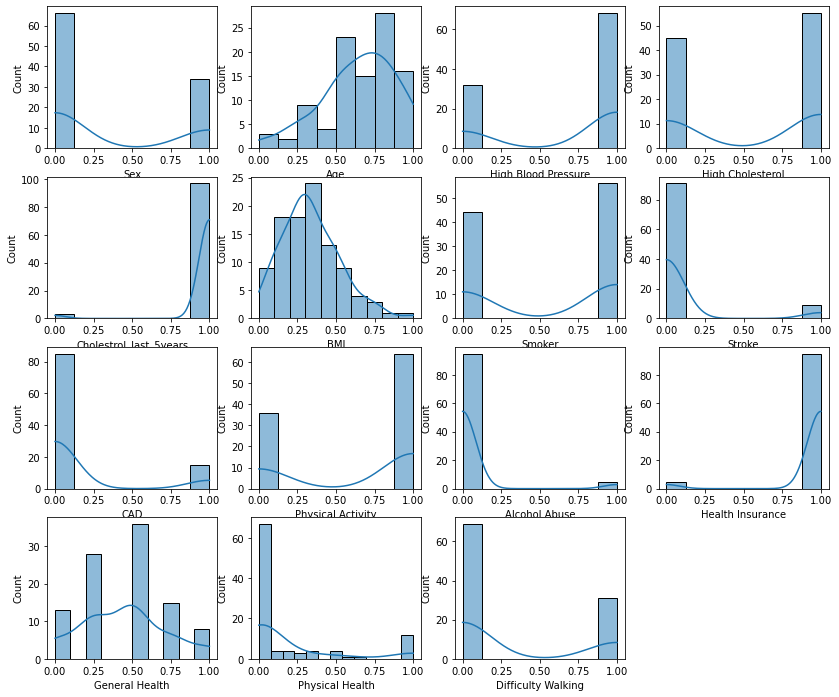

In [25]:
#5.2 Plotting data distribution AFTER normalization
fig = plt.figure(figsize=(14,12))
#draw_chart(normalized_data)
for key, value in enumerate(normalized_data):

    fig.add_subplot(4,4,key+1)
    sns.histplot(data=normalized_data, x=value,kde=True, legend = True)
    
# Scaling has NO impact on the data distribution 
# will use original data for model building

# Q5: Actual data set has a very huge amount of null values. check High BP. should we drop these values?

In [26]:
#For reference
# data.isna().sum()
#Output:
# Sex                                   0
# Age                                 968
# High Blood Pressure               35398
# High Cholesterol                   9999
# Cholesterol Check Past 5 Years     4624
# BMI                                3652
# Smoker                             3569
# Stroke                             2453
# CAD                               16593
# Physical Activity                 11048
# Alcohol Abuse                      3653
# Health Insurance                    976
# General Health                     3361
# Phsyical Health                     922
# Difficulty Walking                 3986
# Education                          5306
# PhysicianID                           0
# Label                                 0

In [27]:
#data.shape
#(245680, 18)

<AxesSubplot:xlabel='Label', ylabel='count'>

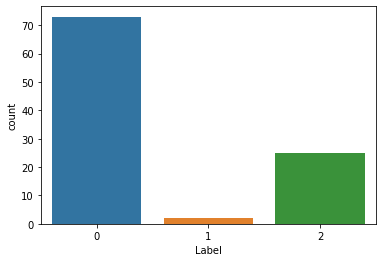

In [28]:
#6. Checking Data imbalance
sns.countplot(x=target, data = input_features)

# Multi-class classification. 
#'0' - no diabetes has highest count. 70
# '1' - Type 1 diabetes. less than 10
# '2' - Type 2 diabetes. less than 30

# Model Building

##### 1. Train Test Split

In [41]:
# Split the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(input_features,target,test_size=0.30,shuffle=True, stratify=target,random_state=20)

In [42]:
# Undersampling


##### 2. Building model.

In [43]:
# Model pipeline
models = []
randomforest = RandomForestClassifier()
lgbm = lgb.LGBMClassifier()
models.append(randomforest)
models.append(lgbm)
models

[RandomForestClassifier(), LGBMClassifier()]

C:\Users\shilp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MODEL: RandomForestClassifier() ,
 Classification report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        22
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7

    accuracy                           0.67        30
   macro avg       0.24      0.30      0.27        30
weighted avg       0.52      0.67      0.59        30

************************************************************
MODEL: LGBMClassifier() ,
 Classification report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7

    accuracy                           0.60        30
   macro avg       0.23      0.27      0.25        30
weighted avg       0.51      0.60      0.55        30

************************************************************


C:\Users\shilp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


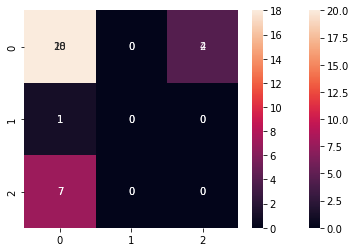

In [44]:
# Model Evaluation
accuracies =[]
confusion_matrices =[]
model_name =[]

for value in models:
    value.fit(x_train,y_train)
    y_predict = value.predict(x_test)
    acc = accuracy_score(y_test,y_predict)
    cm  = confusion_matrix(y_test,y_predict)
    class_report = classification_report(y_test,y_predict)
    accuracies.append(acc)
    model_name.append(value)
    confusion_matrices.append(cm)
        
    sns.heatmap(cm, annot=True)
    model_df = pd.DataFrame({'Model': model_name, 'Accuracy': accuracies})
    print("MODEL: {} ,\n Classification report:\n {}". format(value, class_report))
    print('*'*60)

# The model accuracy is very high. I am assuming its bcoz of only 100 samples

In [45]:
print(model_df)

                                               Model  Accuracy
0  (DecisionTreeClassifier(max_features='auto', r...  0.666667
1                                   LGBMClassifier()  0.600000


In [53]:
imp_feature = randomforest.feature_importances_
features = pd.Series(imp_feature, index= input_features.columns)
features.sort_values(ascending=False)

BMI                       0.192552
Age                       0.163568
General Health            0.157716
Physical Health           0.107779
Smoker                    0.060922
Difficulty Walking        0.051872
Physical Activity         0.048877
Sex                       0.048629
High Cholesterol          0.043093
CAD                       0.040168
Stroke                    0.037740
High Blood Pressure       0.029284
Alcohol Abuse             0.014531
Cholestrol_last_5years    0.001979
Health Insurance          0.001290
dtype: float64

In [90]:
# Checknig model accuracy using SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
svc_acc = accuracy_score(y_pred,y_test)
svc_acc

0.7666666666666667

In [94]:
# Checknig model accuracy using logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_pred,y_test)
lr_acc

C:\Users\shilp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_pred,y_test)
knn_acc

0.7666666666666667